# revisit part

In [1]:
import os


import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Reading csv file
columns_name = [
    "time", "gender", "matric_%", "study_year","faculty","gpa_2023","accomodation","allowance","scholarship",
    "study_hours","party_week","drinks_night","missed_classes","failed_classes","in_relationship","parent_approve","relation_parent"
]
student_data = pd.read_csv("student_survey.csv",names=columns_name,header=0)

In [3]:
student_data.head()

,time,gender,matric_%,study_year,faculty,gpa_2023,accomodation,allowance,scholarship,study_hours,party_week,drinks_night,missed_classes,failed_classes,in_relationship,parent_approve,relation_parent
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


# EDA

* basic informaion
* missing values
* numric and categorial values
* exploration
* visulization
* correlation,outliers

In [4]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             406 non-null    object 
 1   gender           404 non-null    object 
 2   matric_%         399 non-null    float64
 3   study_year       333 non-null    object 
 4   faculty          399 non-null    object 
 5   gpa_2023         320 non-null    float64
 6   accomodation     383 non-null    object 
 7   allowance        375 non-null    object 
 8   scholarship      398 non-null    object 
 9   study_hours      403 non-null    object 
 10  party_week       404 non-null    object 
 11  drinks_night     404 non-null    object 
 12  missed_classes   403 non-null    object 
 13  failed_classes   403 non-null    object 
 14  in_relationship  403 non-null    object 
 15  parent_approve   402 non-null    object 
 16  relation_parent  403 non-null    object 
dtypes: float64(2), o

In [5]:
# to find only missing value

student_data.isna().sum()



time                0
gender              2
matric_%            7
study_year         73
faculty             7
gpa_2023           86
accomodation       23
allowance          31
scholarship         8
study_hours         3
party_week          2
drinks_night        2
missed_classes      3
failed_classes      3
in_relationship     3
parent_approve      4
relation_parent     3
dtype: int64

In [6]:
# description
# among all 17 columns gpa_2023 studey-year have more null value and other have samll null value

<Axes: >

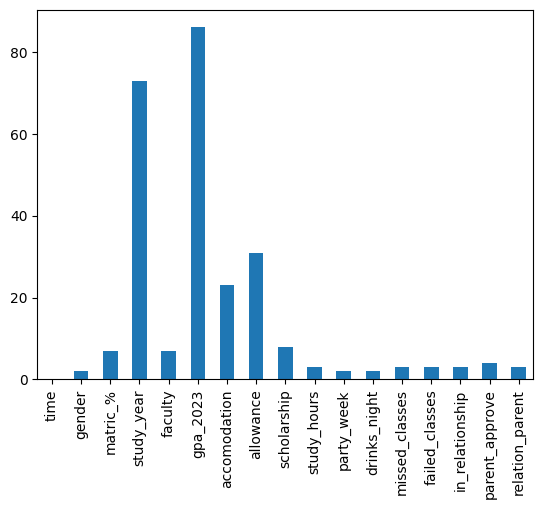

In [7]:
#if we want to ploat
student_data.isna().sum().plot(kind="bar")

<Axes: xlabel='gender'>

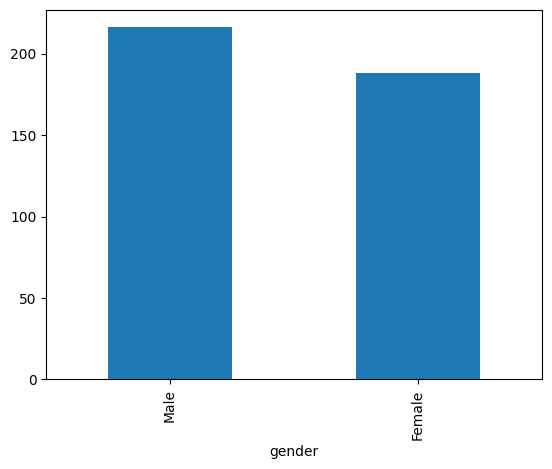

In [8]:
student_data.gender.value_counts().plot(kind="bar")

<Axes: xlabel='drinks_night'>

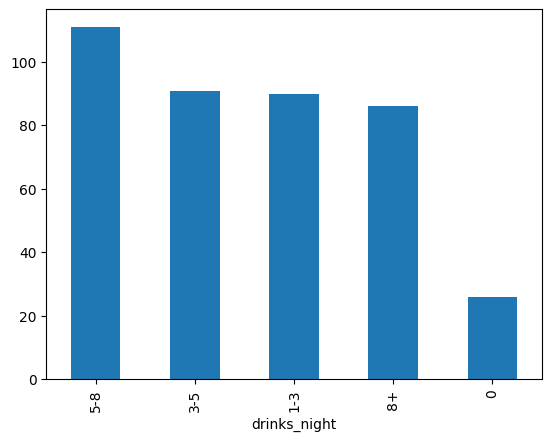

In [9]:
student_data.drinks_night.value_counts().plot(kind="bar")

In [10]:
student_data.gender.value_counts(normalize=True)

gender
Male      0.534653
Female    0.465347
Name: proportion, dtype: float64

in above there are 53% of male and 46% of female students .

In [27]:
# parent_approve , replation_parent we can use crosstab

In [28]:
table = pd.crosstab(student_data.parent_approve,student_data.relation_parent)


In [32]:
table

relation_parent,Close,Distant,Fair,Very close
parent_approve,,,,
No,18,1,9,20
Yes,79,1,25,248


In [34]:
table[["Distant","Fair","Close","Very close"]]

relation_parent,Distant,Fair,Close,Very close
parent_approve,,,,
No,1,9,18,20
Yes,1,25,79,248


In [38]:
table.T

parent_approve,No,Yes
relation_parent,,
Close,18,79
Distant,1,1
Fair,9,25
Very close,20,248


<Axes: xlabel='relation_parent'>

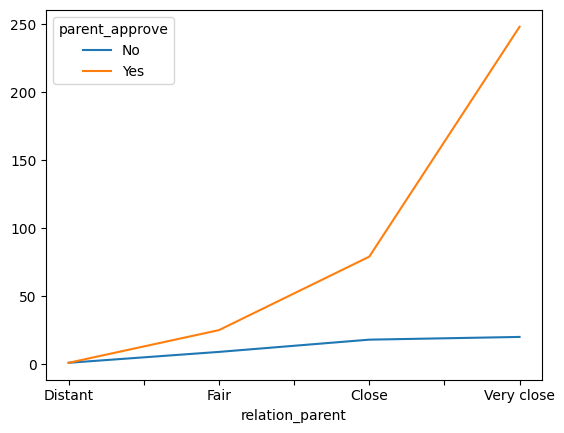

In [39]:
table[["Distant","Fair","Close","Very close"]].T.plot(kind="line")

# relation betn gpa and parent  relation

In [53]:
group_parents = student_data.groupby(by="relation_parent")

In [71]:

info = group_parents[['matric_%']].aggregate(('min','max','mean'))

<Axes: xlabel='relation_parent'>

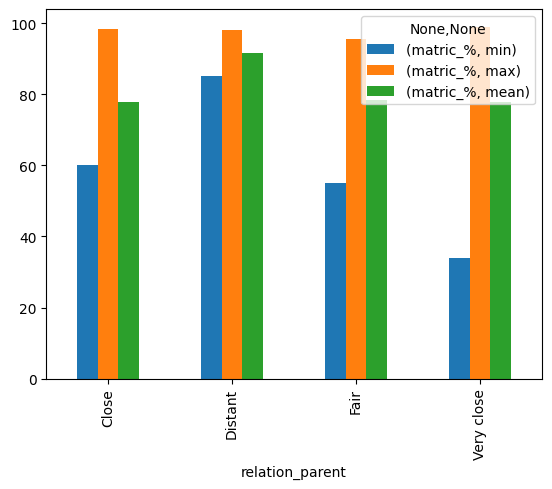

In [72]:
info.plot(kind="bar")

In [98]:

group_faculty = student_data.groupby(by="faculty")
info1 = group_faculty[['matric_%']].aggregate(('min','max','mean'))

<Axes: xlabel='faculty'>

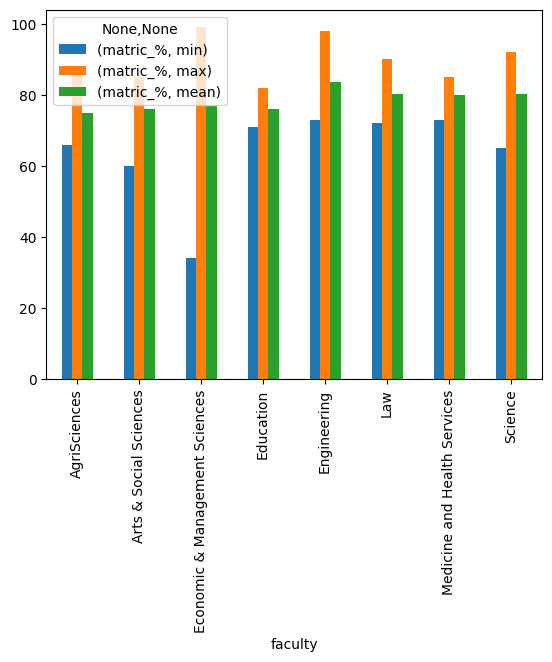

In [99]:
info1.plot(kind='bar')

In [107]:

group_faculty = student_data.groupby(by="faculty")
info2 = group_faculty[['drinks_night']].aggregate("count")

In [108]:
info2

,drinks_night
faculty,
AgriSciences,22
Arts & Social Sciences,47
Economic & Management Sciences,211
Education,6
Engineering,37
Law,10
Medicine and Health Services,10
Science,56


<Axes: xlabel='faculty'>

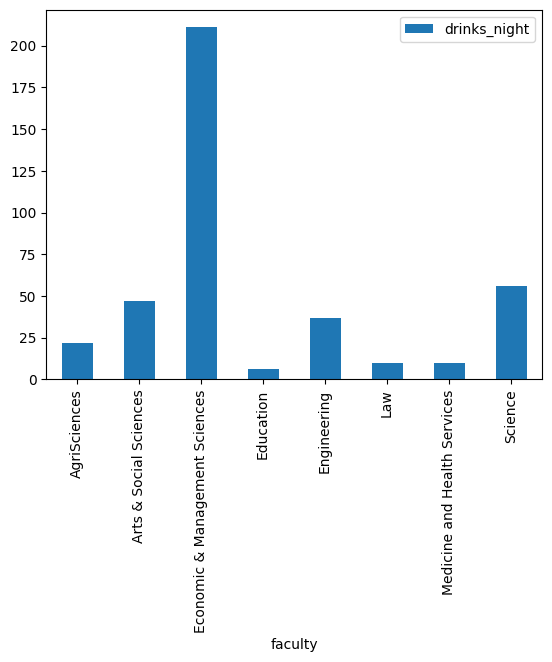

In [109]:
info2.plot(kind='bar')

In [96]:

group_gender = student_data.groupby(by="gender")
info4 = group_gender[['gpa_2023']].aggregate('mean')

<Axes: xlabel='gender'>

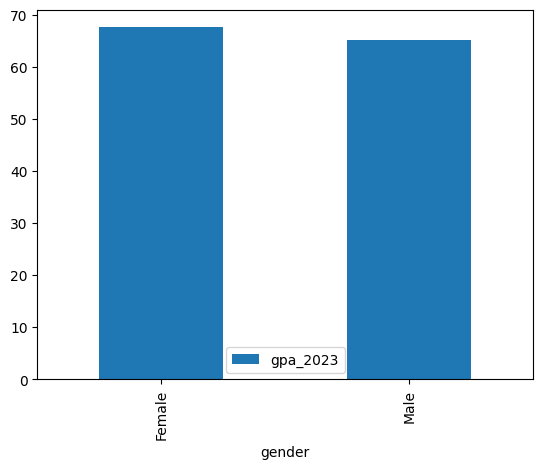

In [97]:
info4.plot(kind="bar")


In [116]:

group_faculty = student_data.groupby(by="relation_parent")
info5 = group_faculty[['matric_%','gpa_2023']].aggregate(('min','max','mean'))
info5

matric_%                   gpa_2023                  
                     min    max       mean      min    max       mean
relation_parent                                                      
Close               60.0  98.33  77.690000     50.0  95.22  65.220769
Distant             85.0  98.00  91.500000     88.0  89.00  88.500000
Fair                55.0  95.50  78.357143     50.0  85.00  66.258065
Very close          34.0  99.00  77.960114     30.0  92.00  66.527356

<Axes: xlabel='None-None', ylabel='relation_parent'>

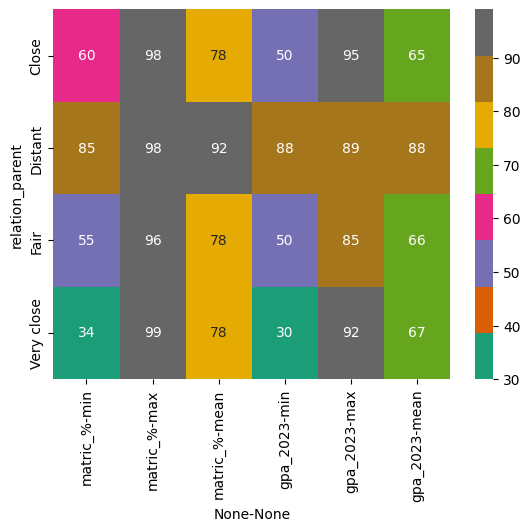

In [118]:
sns.heatmap(info5,annot=True , cmap='Dark2')

<Axes: xlabel='gpa_2023', ylabel='gender'>

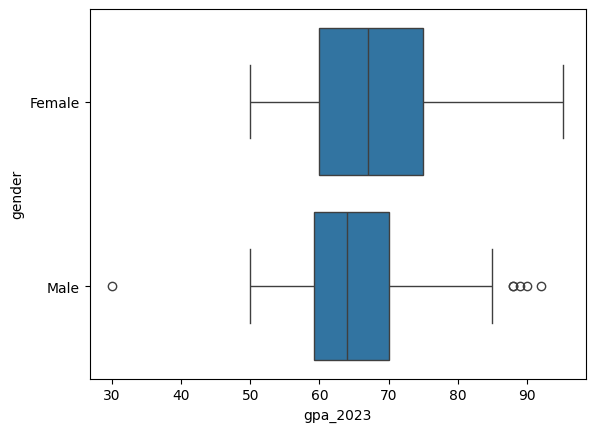

In [122]:
sns.boxplot(student_data,x='gpa_2023',y='gender')

In [123]:
student_data.corr(numeric_only=True)

,matric_%,gpa_2023
matric_%,1.000000,0.299104
gpa_2023,0.299104,1.000000



# manipulation and or cleaning data
* remove unnecessary columns
* null value handling
* outliers handling
* feature engineering
* encoding/normalization/post processing

### remove columns

In [12]:
student_data.drop("time",axis=1,inplace=True)

In [13]:
student_data.head()

,gender,matric_%,study_year,faculty,gpa_2023,accomodation,allowance,scholarship,study_hours,party_week,drinks_night,missed_classes,failed_classes,in_relationship,parent_approve,relation_parent
0,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


## null value

In [14]:
student_data.isna().sum()

gender              2
matric_%            7
study_year         73
faculty             7
gpa_2023           86
accomodation       23
allowance          31
scholarship         8
study_hours         3
party_week          2
drinks_night        2
missed_classes      3
failed_classes      3
in_relationship     3
parent_approve      4
relation_parent     3
dtype: int64

In [15]:
#### cleaning up target value null entries

student_data_1=student_data.dropna(subset="gpa_2023")

In [16]:
student_data_1=student_data.dropna(thresh=5)

In [17]:
student_data_1

,gender,matric_%,study_year,faculty,gpa_2023,accomodation,allowance,scholarship,study_hours,party_week,drinks_night,missed_classes,failed_classes,in_relationship,parent_approve,relation_parent
0,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,Female,74.0,NaN,Science,NaN,Private accommodation/ stay with family/friends,NaN,No,3-5,3,1-3,0,0,No,Yes,Close
402,Female,73.0,2nd Year,Economic & Management Sciences,58.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,"Yes (NSFAS, etc...)",5-8,1,8+,0,0,Yes,Yes,Very close
403,Female,86.0,1st Year,NaN,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,5-8,2,3-5,1,0,No,Yes,Very close
404,Male,85.0,NaN,Economic & Management Sciences,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,1-3,4+,5-8,4+,0,No,Yes,Close


In [18]:
student_data_1.isna().sum()

gender              0
matric_%            5
study_year         71
faculty             5
gpa_2023           84
accomodation       21
allowance          29
scholarship         6
study_hours         1
party_week          0
drinks_night        0
missed_classes      1
failed_classes      1
in_relationship     1
parent_approve      2
relation_parent     1
dtype: int64

In [19]:
student_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 0 to 405
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           404 non-null    object 
 1   matric_%         399 non-null    float64
 2   study_year       333 non-null    object 
 3   faculty          399 non-null    object 
 4   gpa_2023         320 non-null    float64
 5   accomodation     383 non-null    object 
 6   allowance        375 non-null    object 
 7   scholarship      398 non-null    object 
 8   study_hours      403 non-null    object 
 9   party_week       404 non-null    object 
 10  drinks_night     404 non-null    object 
 11  missed_classes   403 non-null    object 
 12  failed_classes   403 non-null    object 
 13  in_relationship  403 non-null    object 
 14  parent_approve   402 non-null    object 
 15  relation_parent  403 non-null    object 
dtypes: float64(2), object(14)
memory usage: 53.7+ KB


In [68]:
# fill null values(sum < 5), check type and impute with mean if numerical ,mode if object)

for col in student_data_1.columns:
    null_count = student_data_1[col].isna().sum()
    if null_count > 0 :  # sum < 5
        if pd.api.types.is_numeric_dtype(student_data_1[col]):
            student_data_1[col].fillna(student_data_1[col].mean(),inplace=True)
        else:
            student_data_1[col].fillna(student_data_1[col].mode()[0],inplace=True)

C:\Users\HELIOS\AppData\Local\Temp\ipykernel_55948\3966892434.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_data_1[col].fillna(student_data_1[col].mean(),inplace=True)


In [69]:
student_data_1.isna().sum()

gender             0
matric_%           0
study_year         0
faculty            0
gpa_2023           0
accomodation       0
allowance          0
scholarship        0
study_hours        0
party_week         0
drinks_night       0
missed_classes     0
failed_classes     0
in_relationship    0
parent_approve     0
relation_parent    0
dtype: int64

# outlier handling

In [70]:
student_data_1[["matric_%","gpa_2023"]].describe()

,matric_%,gpa_2023
count,404.000000,404.000000
mean,78.140199,65.645234
std,6.116079,6.882012
min,63.000000,50.000000
25%,74.000000,61.000000
50%,78.000000,66.268469
75%,83.000000,70.000000
max,96.000000,83.000000


<Axes: >

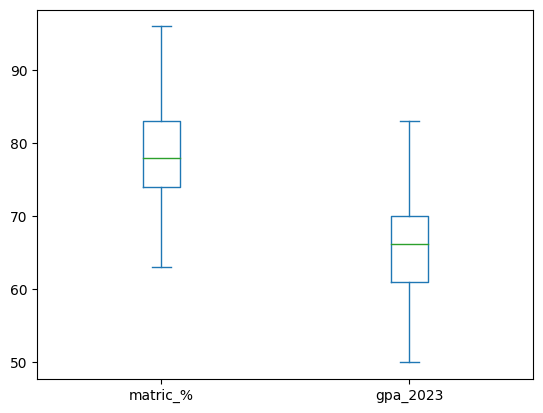

In [71]:
student_data_1[["matric_%","gpa_2023"]].plot(kind="box")

In [72]:
def handle_outlier(series):
   
   
    IQR = series.quantile(0.75)-series.quantile(0.25)
    lower = series.quantile(0.25) - 1.5 * IQR
    upper = series.quantile(0.75) + 1.5 * IQR

    to_drop = series[(series>upper)|(series<lower)]
    print(to_drop)
    return series.drop(to_drop.index,axis=0)
    


In [73]:
student_data_1.gpa_2023 = handle_outlier(student_data_1.gpa_2023)



Series([], Name: gpa_2023, dtype: float64)


C:\Users\HELIOS\AppData\Local\Temp\ipykernel_55948\1590411258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_data_1.gpa_2023 = handle_outlier(student_data_1.gpa_2023)


In [74]:
student_data_1["matric_%"] = handle_outlier(student_data_1["matric_%"])




Series([], Name: matric_%, dtype: float64)


C:\Users\HELIOS\AppData\Local\Temp\ipykernel_55948\3866412161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_data_1["matric_%"] = handle_outlier(student_data_1["matric_%"])


<Axes: >

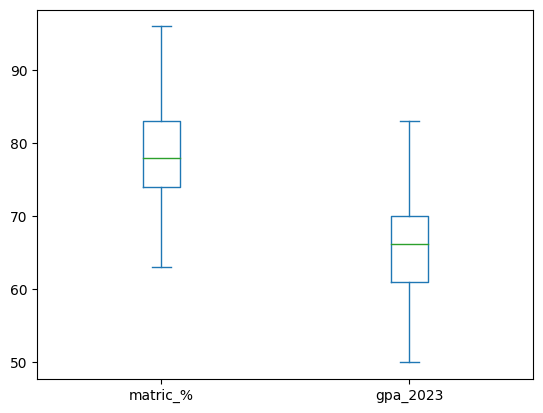

In [75]:
student_data_1[["matric_%","gpa_2023"]].plot(kind="box")

In [76]:
student_data_1[["matric_%","gpa_2023"]].describe()

,matric_%,gpa_2023
count,404.000000,404.000000
mean,78.140199,65.645234
std,6.116079,6.882012
min,63.000000,50.000000
25%,74.000000,61.000000
50%,78.000000,66.268469
75%,83.000000,70.000000
max,96.000000,83.000000


In [67]:
student_data_1.isna().sum()

gender              0
matric_%            8
study_year          0
faculty             0
gpa_2023           14
accomodation        0
allowance           0
scholarship         0
study_hours         0
party_week          0
drinks_night        0
missed_classes      0
failed_classes      0
in_relationship     0
parent_approve      0
relation_parent     0
dtype: int64

In [65]:
student_data_1.to_csv("clean_student_data.csv",index = False)